In [ ]:
# !pip install catboost
# !pip install fairlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 13.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.3
    Uninstalling scipy-1.16.3:
      Successfully uninstalled scipy-1.16.3


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


Mounted at /content/drive


In [ ]:
data_file_path = '../data/censusbureau.data'
columns_file_path = '../data/census-bureau.columns'
with open(columns_file_path, 'r') as f:
    columns = [line.strip() for line in f if line.strip()]
df = pd.read_csv(data_file_path, header=None)
df.columns = columns

In [5]:
df.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer stat,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,weight,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,label
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [4]:
target = 'label'
weight_column = 'weight'
continuous_columns = ['age','wage per hour','capital gains','capital losses','dividends from stocks','num persons worked for employer','weeks worked in year']
categorical_columns = [col for col in df.columns if col not in continuous_columns + [target,weight_column]]
print(categorical_columns)

['class of worker', 'detailed industry recode', 'detailed occupation recode', 'education', 'enroll in edu inst last wk', 'marital stat', 'major industry code', 'major occupation code', 'race', 'hispanic origin', 'sex', 'member of a labor union', 'reason for unemployment', 'full or part time employment stat', 'tax filer stat', 'region of previous residence', 'state of previous residence', 'detailed household and family stat', 'detailed household summary in household', 'migration code-change in msa', 'migration code-change in reg', 'migration code-move within reg', 'live in this house 1 year ago', 'migration prev res in sunbelt', 'family members under 18', 'country of birth father', 'country of birth mother', 'country of birth self', 'citizenship', 'own business or self employed', "fill inc questionnaire for veteran's admin", 'veterans benefits', 'year']


# Data Preprocessing

## Data Cleaning

In [6]:
# Handling Target variable
df['label'] = df['label'].map({'- 50000.': 0, '50000+.': 1})

In [27]:
df.groupby('label')['weight'].sum()

,weight
label,
0,3.250046e+08
1,2.224125e+07


In [7]:
# Handling Missing values
print(df.isna().sum().to_json())
df.columns[df.eq('?').any()]

{"age":0,"class of worker":0,"detailed industry recode":0,"detailed occupation recode":0,"education":0,"wage per hour":0,"enroll in edu inst last wk":0,"marital stat":0,"major industry code":0,"major occupation code":0,"race":0,"hispanic origin":874,"sex":0,"member of a labor union":0,"reason for unemployment":0,"full or part time employment stat":0,"capital gains":0,"capital losses":0,"dividends from stocks":0,"tax filer stat":0,"region of previous residence":0,"state of previous residence":0,"detailed household and family stat":0,"detailed household summary in household":0,"weight":0,"migration code-change in msa":0,"migration code-change in reg":0,"migration code-move within reg":0,"live in this house 1 year ago":0,"migration prev res in sunbelt":0,"num persons worked for employer":0,"family members under 18":0,"country of birth father":0,"country of birth mother":0,"country of birth self":0,"citizenship":0,"own business or self employed":0,"fill inc questionnaire for veteran's admi

Index(['state of previous residence', 'migration code-change in msa',
       'migration code-change in reg', 'migration code-move within reg',
       'migration prev res in sunbelt', 'country of birth father',
       'country of birth mother', 'country of birth self'],
      dtype='object')

In [8]:
# Handling NaN in 'Hispanic Origin' -> Replacing to 'Do not know' preexisting values
df['hispanic origin'].value_counts(dropna=False)
df['hispanic origin'] = df['hispanic origin'].fillna('Do not know')

In [ ]:
# '?' present only in categorical variable
# Options - 1. Dropping rows (x) 2. Replace with Mode, 3. Create a new Category-'Unknown' (suitable for tree), 4. ML technique - KNN imputation (unsuitable for high dimension)/Decision Stump

print(df.apply(lambda row: row.astype(str).str.contains('?', regex=False).any(), axis=1).sum()) # count of rows with '?' - 104393

104393


In [9]:
df[categorical_columns] = df[categorical_columns].replace('?', np.nan)

In [10]:
#ORDINAL RANKING OF education
education_rank = {
    'Children': 1,
    'Less than 1st grade': 2,
    '1st 2nd 3rd or 4th grade': 3,
    '5th or 6th grade': 4,
    '7th and 8th grade': 5,
    '9th grade': 6,
    '10th grade': 7,
    '11th grade': 8,
    '12th grade no diploma': 9,
    'High school graduate': 10,
    'Some college but no degree': 11,
    'Associates degree-occup /vocational': 12,
    'Associates degree-academic program': 13,
    'Bachelors degree(BA AB BS)': 14,
    'Masters degree(MA MS MEng MEd MSW MBA)': 15,
    'Prof school degree (MD DDS DVM LLB JD)': 16,
    'Doctorate degree(PhD EdD)': 17
}
df['education'] = df['education'].map(education_rank)

In [11]:
categorical_columns.remove('education')
continuous_columns.append('education')

In [11]:
# Testing a simple Random Forest to check which imputation technique to pick
from sklearn.model_selection import train_test_split

X = df.drop(columns=['label','weight'])
y = df['label']
w = df['weight']

X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X, y, w,
    test_size=0.2,
    random_state=121,
    stratify=y
)
print(len(X_train),len(X_test))

159618 39905


In [33]:
# #Checking Distribution
# for i in categorical_columns:
#   print(i)
#   print(X_train[i].value_counts(dropna=False,normalize = True))
#   print(X_test[i].value_counts(dropna=False,normalize = True))

## Testing Imputation techniques

Imputing Null values using
1. Mode
2. Creating extra category
2. KNN
3. Random Forest Impute

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.metrics import *

In [14]:
def ordinal_encode(X_train, X_test, cat_cols):
    enc = OrdinalEncoder(
        handle_unknown='use_encoded_value',
        unknown_value=-1,
        encoded_missing_value=np.nan   # preserve NaN so imputers see it
    )
    X_tr = X_train.copy()
    X_te = X_test.copy()
    X_tr[cat_cols] = enc.fit_transform(X_train[cat_cols])
    X_te[cat_cols] = enc.transform(X_test[cat_cols])
    return X_tr, X_te
def onehot_encode(X_train, X_test, cat_cols):
    from sklearn.preprocessing import OneHotEncoder
    enc = OneHotEncoder(
        handle_unknown='ignore',   # unseen test categories to all-zero row
        drop='first',
        sparse_output=False
    )
    X_tr = X_train.copy().reset_index(drop=True)
    X_te = X_test.copy().reset_index(drop=True)
    ohe_tr = enc.fit_transform(X_tr[cat_cols])
    ohe_te = enc.transform(X_te[cat_cols])
    ohe_cols = enc.get_feature_names_out(cat_cols)
    X_tr = pd.concat(
        [X_tr.drop(columns=cat_cols),
         pd.DataFrame(ohe_tr, columns=ohe_cols)],
        axis=1
    )
    X_te = pd.concat(
        [X_te.drop(columns=cat_cols),
         pd.DataFrame(ohe_te, columns=ohe_cols)],
        axis=1
    )
    return X_tr, X_te

def impute_mode(X_train_raw, X_test_raw, cat_cols):
    imp = SimpleImputer(strategy='most_frequent')
    X_tr = X_train_raw.copy()
    X_te = X_test_raw.copy()
    X_tr[cat_cols] = imp.fit_transform(X_train_raw[cat_cols])
    X_te[cat_cols] = imp.transform(X_test_raw[cat_cols])
    return X_tr, X_te

def impute_knn(X_train_raw, X_test_raw, cat_cols, cont_cols, n_neighbors=5):
    X_tr_enc, X_te_enc = ordinal_encode(X_train_raw, X_test_raw, cat_cols)
    imp = KNNImputer(n_neighbors=n_neighbors)
    X_tr_enc[cat_cols] = imp.fit_transform(X_tr_enc[cat_cols])
    X_te_enc[cat_cols] = imp.transform(X_te_enc[cat_cols])
    X_tr_enc[cat_cols] = X_tr_enc[cat_cols].round().astype(int)
    X_te_enc[cat_cols] = X_te_enc[cat_cols].round().astype(int)

    return X_tr_enc, X_te_enc

def impute_rf_single_col(X_train_enc, X_test_enc, col, cat_cols):
    other_cols = [c for c in X_train_enc.columns if c != col]
    known_tr   = X_train_enc[X_train_enc[col].notna()]
    unknown_tr = X_train_enc[X_train_enc[col].isna()]
    unknown_te = X_test_enc[X_test_enc[col].isna()]
    if unknown_tr.empty and unknown_te.empty:
        return X_train_enc, X_test_enc  # nothing to impute

    # Temporary fill for any remaining NaN with column mode
    X_feat_tr = known_tr[other_cols].fillna(known_tr[other_cols].mode())
    y_feat_tr = known_tr[col]

    rf = RandomForestClassifier(
        n_estimators=50, max_depth=10,
        n_jobs=-1, random_state=131
    )
    rf.fit(X_feat_tr, y_feat_tr)

    if not unknown_tr.empty:
        X_pred = unknown_tr[other_cols].fillna(known_tr[other_cols].mode())
        X_train_enc.loc[unknown_tr.index, col] = rf.predict(X_pred)

    # Predict missing in test
    if not unknown_te.empty:
        X_pred = unknown_te[other_cols].fillna(known_tr[other_cols].mode())
        X_test_enc.loc[unknown_te.index, col] = rf.predict(X_pred)

    return X_train_enc, X_test_enc


def impute_rf(X_train_raw, X_test_raw, cat_cols, cont_cols):
    X_tr_enc, X_te_enc = ordinal_encode(X_train_raw, X_test_raw, cat_cols)
    cols_with_missing = [
        c for c in cat_cols
        if X_tr_enc[c].isna().any() or X_te_enc[c].isna().any()
    ]

    for col in cols_with_missing:
        X_tr_enc, X_te_enc = impute_rf_single_col(X_tr_enc, X_te_enc, col, cat_cols)
    return X_tr_enc, X_te_enc

def evaluate(X_tr, X_te, y_tr, y_te):
    clf = RandomForestClassifier(
        n_estimators=100, n_jobs=-1, random_state=131
    )
    clf.fit(X_tr, y_tr,w_train)
    preds      = clf.predict(X_te)
    proba      = clf.predict_proba(X_te)[:, 1]
    acc        = accuracy_score(y_te, preds, sample_weight = w_test)
    f1         = f1_score(y_te, preds, sample_weight = w_test)
    roc        = roc_auc_score(y_te, proba, sample_weight = w_test)
    print(f"Accuracy: {acc:.4f}  |  F1: {f1:.4f}  |  ROC-AUC: {roc:.4f}")
    print(classification_report(y_te, preds, sample_weight = w_test))

def impute_unknown(X_train_raw, X_test_raw, cat_cols):
    X_tr = X_train_raw.copy()
    X_te = X_test_raw.copy()
    X_tr[cat_cols] = X_tr[cat_cols].fillna('Unknown')
    X_te[cat_cols] = X_te[cat_cols].fillna('Unknown')
    return X_tr, X_te

In [ ]:
#  --- Mode ---
print("Mode imputation - One hot vs Label Encoding")
X_tr_m, X_te_m = impute_mode(X_train, X_test, categorical_columns)
# Encode categoricals for the downstream RF
X_tr_m_enc, X_te_m_enc = ordinal_encode(X_tr_m, X_te_m, categorical_columns)
X_tr_m_ohe, X_te_m_ohe = onehot_encode(X_tr_m, X_te_m, categorical_columns)
evaluate(X_tr_m_ohe, X_te_m_ohe, y_train, y_test)
evaluate(X_tr_m_enc, X_te_m_enc, y_train, y_test)

# --- Impute extra category ---
print("Extra Category Imputation - One hot vs Label Encoding")
X_tr_u, X_te_u = impute_unknown(X_train, X_test, categorical_columns)
X_tr_u_enc, X_te_u_enc = ordinal_encode(X_tr_u, X_te_u, categorical_columns)
X_tr_u_ohe, X_te_u_ohe = onehot_encode(X_tr_u, X_te_u, categorical_columns)
evaluate(X_tr_u_ohe, X_te_u_ohe, y_train, y_test)
evaluate(X_tr_u_enc, X_te_u_enc, y_train, y_test)

# --- KNN ---
# print("KNN imputation (k=5)")
# X_tr_k, X_te_k = impute_knn(X_train, X_test, categorical_columns, continuous_columns)
# evaluate( X_tr_k, X_te_k, y_train, y_test)

# --- Random Forest ---
print("Random Forest imputation")
X_tr_rf, X_te_rf = impute_rf(X_train, X_test, categorical_columns, continuous_columns)
evaluate(X_tr_rf, X_te_rf, y_train, y_test)


Mode imputation - One hot vs Label Encoding
Accuracy: 0.9529  |  F1: 0.5205  |  ROC-AUC: 0.9339
              precision    recall  f1-score   support

           0       0.96      0.99      0.98 64875773.33000002
           1       0.76      0.39      0.52 4494016.6700000055

    accuracy                           0.95 69369790.00000003
   macro avg       0.86      0.69      0.75 69369790.00000003
weighted avg       0.95      0.95      0.95 69369790.00000003

Accuracy: 0.9546  |  F1: 0.5519  |  ROC-AUC: 0.9362
              precision    recall  f1-score   support

           0       0.96      0.99      0.98 64875773.33000002
           1       0.77      0.43      0.55 4494016.6700000055

    accuracy                           0.95 69369790.00000003
   macro avg       0.86      0.71      0.76 69369790.00000003
weighted avg       0.95      0.95      0.95 69369790.00000003

Extra Category Imputation - One hot vs Label Encoding
Accuracy: 0.9523  |  F1: 0.5082  |  ROC-AUC: 0.9340
          

Best Imputation for Null values - Creating Extra Category

In [12]:
for col in categorical_columns:
    df[col] = df[col].fillna('Unknown')

# Feature Engineering

In [45]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['label','weight'])
y = df['label']
w = df['weight']

X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X, y, w,
    test_size=0.2,
    random_state=121,
    stratify=y   # very important if classification
)
print(len(X_train),len(X_test))

159618 39905


## Weight of Evidence - for Feature imp/ categorical imputing (tested with logistic & RF)



In [24]:
# Rules related to WOE
# Each category (bin) should have at least 5% of the observations.
# Each category (bin) should be non-zero for both non-events and events.
# The WOE should be distinct for each category. Similar groups should be aggregated.
# The WOE should be monotonic, i.e. either growing or decreasing with the groupings.
# Missing values are binned separately.

def calculate_woe_iv(data, target, bins=10):
    woe_iv_mapping = {}
    iv_summary = []

    for col in data.columns:
        if col == target:
            continue

        if col in continuous_columns:  # Continuous columns
            unique_vals = data[col].nunique()
            num_bins = min(bins, unique_vals)  # Use fewer bins if unique values are less than specified bins
            try:
                data[col], bin_edges = pd.qcut(data[col], q=num_bins, retbins=True, duplicates='drop')
            except ValueError:
                data[col], bin_edges = pd.cut(data[col], bins=num_bins, retbins=True, duplicates='drop')

        else:  # Categorical columns
            data[col] = data[col].astype(str)

        # Calculate WoE and IV
        woe_df = data.groupby(col)[target].agg(['count', 'sum'])
        woe_df.columns = ['total', 'bad']
        woe_df['good'] = woe_df['total'] - woe_df['bad']
        woe_df['dist_good'] = woe_df['good'] / woe_df['good'].sum()
        woe_df['dist_bad'] = woe_df['bad'] / woe_df['bad'].sum()
        woe_df['woe'] = np.log(woe_df['dist_good'] / woe_df['dist_bad']).replace([np.inf, -np.inf], 0)
        woe_df['iv'] = (woe_df['dist_good'] - woe_df['dist_bad']) * woe_df['woe']
        iv = woe_df['iv'].sum()

        # Store WoE mapping
        woe_iv_mapping[col] = woe_df['woe'].to_dict()
        iv_summary.append({'feature': col, 'iv': iv})

    # Convert IV summary to DataFrame
    iv_summary = pd.DataFrame(iv_summary).sort_values(by='iv', ascending=False)
    return woe_iv_mapping, iv_summary

df_train_woe = pd.concat([X_train,y_train],axis=1)
woe_mapping, iv_summary = calculate_woe_iv(df_train_woe, target='label')

In [25]:
iv_summary

,feature,iv
23,detailed household summary in household,2.704412
22,detailed household and family stat,2.698548
19,tax filer stat,2.342329
3,detailed occupation recode,2.330369
4,education,2.259573
9,major occupation code,2.009508
30,family members under 18,1.692381
38,weeks worked in year,1.675315
2,detailed industry recode,1.551247
8,major industry code,1.495145


In [26]:
def apply_woe_mapping(data, woe_mapping):
    transformed_data = data.copy()
    for col, mapping in woe_mapping.items():
         if col in transformed_data.columns:
            transformed_data[col] = (
                transformed_data[col]
                .astype(str)      # break categorical dtype
                .map(mapping)
                .fillna(0)
                .astype(float)
            )
    return transformed_data

df_test_woe = pd.concat([X_test,y_test],axis=1)
df_test_woe = apply_woe_mapping(df_test_woe, woe_mapping)
df_train_woe = apply_woe_mapping(df_train_woe, woe_mapping)

In [27]:
df_train_woe.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer stat,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,label
40947,0.0,2.014409,2.015955,2.015955,0.0,0.0,-0.066741,-0.665665,2.015955,2.015955,-0.088033,-0.103904,0.911996,0.104460,-0.017981,0.284226,0.0,0.0,0.0,0.135102,-0.032803,-0.032803,0.122942,0.123322,-0.019866,-0.019866,-0.019866,-0.019866,-0.000639,0.0,-0.351229,-0.644789,-0.677139,-0.487096,-0.476903,0.074289,0.009379,-0.28699,0.0,0.062417,0
23565,0.0,2.014409,2.015955,2.015955,0.0,0.0,-0.066741,1.600934,2.015955,2.015955,-0.088033,-0.103904,0.911996,0.104460,-0.017981,0.284226,0.0,0.0,0.0,5.031409,-0.032803,-0.032803,7.889204,7.891136,-0.059259,-0.059259,-0.059259,-0.043258,-0.059259,0.0,7.631767,-0.045693,-0.043634,-0.017656,-0.017641,0.074289,0.009379,0.00000,0.0,-0.059259,0
921,0.0,-0.543990,0.680348,2.595414,0.0,0.0,-0.066741,-0.665665,0.680348,1.997930,-0.172184,-0.103904,-0.535384,0.104460,-0.017981,-0.831625,0.0,0.0,0.0,-0.824664,-0.032803,-0.032803,-0.956897,-0.793206,-0.059259,-0.059259,-0.059259,-0.043258,-0.059259,0.0,-0.351229,1.077103,1.113069,0.895345,0.530432,0.074289,0.009379,-0.28699,0.0,-0.059259,0
102705,0.0,2.014409,2.015955,2.015955,0.0,0.0,-0.066741,0.731581,2.015955,2.015955,-0.088033,-0.103904,0.911996,0.104460,-0.017981,0.284226,0.0,0.0,0.0,0.002191,-0.032803,-0.032803,-0.294074,-0.793206,-0.019866,-0.019866,-0.019866,-0.019866,-0.000639,0.0,-0.351229,-0.295001,-0.234200,-0.017656,-0.017641,0.074289,0.009379,-0.28699,0.0,0.062417,0
135650,0.0,-0.569606,-1.532498,-0.784977,0.0,0.0,-0.066741,-0.313180,-1.532498,-0.729191,-0.088033,-0.103904,-0.535384,-0.662646,-0.017981,-0.831625,0.0,0.0,0.0,0.002191,-0.032803,-0.032803,0.996715,1.985172,-0.059259,-0.059259,-0.059259,-0.043258,-0.059259,0.0,-0.351229,-0.045693,-0.043634,-0.017656,-0.017641,0.074289,0.009379,-0.28699,0.0,-0.059259,0


In [28]:
df_test_woe.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer stat,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,label
113686,0.0,2.014409,2.015955,2.015955,0.0,0.0,-0.066741,1.600934,2.015955,2.015955,-0.172184,-0.103904,0.911996,0.104460,-0.017981,0.284226,0.0,0.0,0.0,5.031409,-0.032803,-0.032803,2.191499,1.985172,-0.019866,-0.019866,-0.019866,-0.019866,-0.000639,0.0,-0.351229,-0.453810,-0.336027,-0.966373,0.530432,0.074289,0.009379,-0.28699,0.0,0.062417,0
77080,0.0,2.014409,2.015955,2.015955,0.0,0.0,-0.066741,1.600934,2.015955,2.015955,-0.088033,-0.103904,0.911996,0.104460,-0.017981,0.284226,0.0,0.0,0.0,5.031409,-0.032803,-0.032803,7.889204,7.891136,-0.019866,-0.019866,-0.019866,-0.019866,-0.000639,0.0,7.631767,-0.045693,-0.043634,-0.017656,-0.017641,0.074289,0.009379,0.00000,0.0,0.062417,0
151693,0.0,2.014409,2.015955,2.015955,0.0,0.0,-0.066741,1.600934,2.015955,2.015955,0.892079,-0.103904,-0.535384,0.104460,-0.017981,0.284226,0.0,0.0,0.0,5.031409,0.705427,0.452010,7.889204,7.891136,0.315304,0.613983,0.613983,0.478431,0.403746,0.0,0.000000,-0.045693,-0.043634,-0.017656,-0.017641,0.074289,0.009379,-0.28699,0.0,0.062417,0
6307,0.0,-0.543990,0.283236,1.451092,0.0,0.0,4.797773,1.600934,0.283236,1.285986,-0.088033,-0.103904,-0.535384,-0.662646,-0.017981,0.284226,0.0,0.0,0.0,0.002191,-0.032803,-0.032803,7.889204,7.891136,-0.019866,-0.019866,-0.019866,-0.019866,-0.000639,0.0,7.631767,-0.045693,-0.043634,-0.017656,-0.017641,0.074289,0.009379,-0.28699,0.0,0.062417,0
26756,0.0,2.014409,2.015955,2.015955,0.0,0.0,-0.066741,-0.665665,2.015955,2.015955,-0.088033,-0.103904,0.911996,0.104460,-0.017981,1.350585,0.0,0.0,0.0,-0.824664,-0.032803,-0.032803,-0.956897,-0.793206,-0.059259,-0.059259,-0.059259,-0.043258,-0.059259,0.0,-0.351229,-0.045693,-0.043634,-0.017656,-0.017641,0.074289,0.009379,-0.28699,0.0,-0.059259,0


In [30]:
woe_imp_features = iv_summary[iv_summary["iv"]>0.02].feature.to_list()
print(woe_imp_features)

['detailed household summary in household', 'detailed household and family stat', 'tax filer stat', 'detailed occupation recode', 'education', 'major occupation code', 'family members under 18', 'weeks worked in year', 'detailed industry recode', 'major industry code', 'class of worker', 'age', 'marital stat', 'num persons worked for employer', 'dividends from stocks', 'sex', 'full or part time employment stat', 'enroll in edu inst last wk', 'country of birth father', 'hispanic origin', 'country of birth mother', 'race', 'country of birth self', 'veterans benefits', 'member of a labor union', 'own business or self employed', 'citizenship', 'state of previous residence', 'reason for unemployment', 'migration code-change in msa']


In [31]:
X_train, X_test, y_train, y_test = df_train_woe.drop(["label"],axis=1), df_test_woe.drop(["label"],axis=1), df_train_woe["label"], df_test_woe["label"]

In [34]:
#LR
print("\n=== Logistic Regression ===\n")
from sklearn.linear_model import *
from sklearn.metrics import *
clf = LogisticRegression(random_state=431)
clf.fit(X_train, y_train,sample_weight=w_train)
y_pred = clf.predict(X_test)
y_proba      = clf.predict_proba(X_test)[:, 1]
acc        = accuracy_score(y_test, y_pred, sample_weight = w_test)
f1         = f1_score(y_test, y_pred, sample_weight = w_test)
roc        = roc_auc_score(y_test, y_proba, sample_weight = w_test)
print(f"Accuracy: {acc:.4f}  |  F1: {f1:.4f}  |  ROC-AUC: {roc:.4f}")
print(classification_report(y_test, y_pred, sample_weight = w_test))

cf_matrix =  confusion_matrix(y_test, y_pred,  sample_weight = w_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred, sample_weight = w_test))



=== Logistic Regression ===

Accuracy: 0.9409  |  F1: 0.2799  |  ROC-AUC: 0.9113
              precision    recall  f1-score   support

           0       0.95      0.99      0.97 64875773.33000002
           1       0.66      0.18      0.28 4494016.6700000055

    accuracy                           0.94 69369790.00000003
   macro avg       0.80      0.59      0.62 69369790.00000003
weighted avg       0.93      0.94      0.92 69369790.00000003

Confusion Matrix:
 [[64472305.23000005   403468.1       ]
 [ 3696989.26000001   797027.41      ]]


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
print("\n=== Random Forest ===\n")
clf = RandomForestClassifier(random_state=131)
clf.fit(X_train, y_train,sample_weight=w_train)
y_pred = clf.predict(X_test)
y_proba      = clf.predict_proba(X_test)[:, 1]
acc        = accuracy_score(y_test, y_pred, sample_weight = w_test)
f1         = f1_score(y_test, y_pred, sample_weight = w_test)
roc        = roc_auc_score(y_test, y_proba, sample_weight = w_test)
print(f"Accuracy: {acc:.4f}  |  F1: {f1:.4f}  |  ROC-AUC: {roc:.4f}")
print(classification_report(y_test, y_pred, sample_weight = w_test))

cf_matrix =  confusion_matrix(y_test, y_pred,  sample_weight = w_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred, sample_weight = w_test))


=== Random Forest ===

Accuracy: 0.9376  |  F1: 0.3750  |  ROC-AUC: 0.8804
              precision    recall  f1-score   support

           0       0.95      0.98      0.97 64875773.33000002
           1       0.53      0.29      0.38 4494016.6700000055

    accuracy                           0.94 69369790.00000003
   macro avg       0.74      0.64      0.67 69369790.00000003
weighted avg       0.93      0.94      0.93 69369790.00000003

Confusion Matrix:
 [[63738639.88000005  1137133.45      ]
 [ 3194314.61000001  1299702.06      ]]


Poor ROC AUC from WOE, can be used for feature selection

# Feature Selection

RF feature importance vs  WOE feature selection

In [ ]:
# print(woe_imp_features)

['detailed household summary in household', 'detailed household and family stat', 'tax filer stat', 'detailed occupation recode', 'education', 'major occupation code', 'family members under 18', 'weeks worked in year', 'detailed industry recode', 'major industry code', 'class of worker', 'age', 'marital stat', 'num persons worked for employer', 'dividends from stocks', 'sex', 'full or part time employment stat', 'enroll in edu inst last wk', 'country of birth father', 'hispanic origin', 'country of birth mother', 'race', 'country of birth self', 'veterans benefits', 'member of a labor union', 'own business or self employed', 'citizenship', 'state of previous residence', 'reason for unemployment', 'migration code-change in msa']


In [36]:
woe_imp_features = ['detailed household summary in household', 'detailed household and family stat', 'tax filer stat', 'detailed occupation recode', 'education', 'major occupation code', 'family members under 18', 'weeks worked in year', 'detailed industry recode', 'major industry code', 'class of worker', 'age', 'marital stat', 'num persons worked for employer', 'dividends from stocks', 'sex', 'full or part time employment stat', 'enroll in edu inst last wk', 'country of birth father', 'hispanic origin', 'country of birth mother', 'race', 'country of birth self', 'veterans benefits', 'member of a labor union', 'own business or self employed', 'citizenship', 'state of previous residence', 'reason for unemployment', 'migration code-change in msa']

In [46]:
# Current Baseline

#  Add extra category for 'unknown' to impute + Label Encoding (suitable for Tree based)

X_train[categorical_columns] = X_train[categorical_columns].fillna('Unknown')
X_test[categorical_columns] = X_test[categorical_columns].fillna('Unknown')

from sklearn.preprocessing import LabelEncoder
encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])

    # Handle unseen categories in test
    X_test[col] = X_test[col].map(lambda s: s if s in le.classes_ else 'Unknown')
    le.classes_ = np.append(le.classes_, 'Unknown') if 'Unknown' not in le.classes_ else le.classes_
    X_test[col] = le.transform(X_test[col])
    encoders[col] = le


In [47]:

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=131,n_jobs=-1)

clf.fit(X_train, y_train,sample_weight=w_train)
y_pred = clf.predict(X_test)
y_proba      = clf.predict_proba(X_test)[:, 1]
acc        = accuracy_score(y_test, y_pred, sample_weight = w_test)
f1         = f1_score(y_test, y_pred, sample_weight = w_test)
roc        = roc_auc_score(y_test, y_proba, sample_weight = w_test)
print(f"Accuracy: {acc:.4f}  |  F1: {f1:.4f}  |  ROC-AUC: {roc:.4f}")
print(classification_report(y_test, y_pred, sample_weight = w_test))

cf_matrix =  confusion_matrix(y_test, y_pred,  sample_weight = w_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred,sample_weight = w_test))

Accuracy: 0.9547  |  F1: 0.5521  |  ROC-AUC: 0.9363
              precision    recall  f1-score   support

           0       0.96      0.99      0.98 64875773.33000002
           1       0.77      0.43      0.55 4494016.6700000055

    accuracy                           0.95 69369790.00000003
   macro avg       0.86      0.71      0.76 69369790.00000003
weighted avg       0.95      0.95      0.95 69369790.00000003

Confusion Matrix:
 [[64289143.63000005   586629.7       ]
 [ 2556902.28        1937114.39      ]]


In [48]:
importances = clf.feature_importances_
feat_imp = pd.DataFrame({'feature': X_train.columns,'importance': importances})
top25 = feat_imp.sort_values(by='importance', ascending=False).head(25)
print(top25)

                                    feature  importance
0                                       age    0.109039
4                                 education    0.107724
18                    dividends from stocks    0.086331
16                            capital gains    0.084466
3                detailed occupation recode    0.075775
2                  detailed industry recode    0.058651
29          num persons worked for employer    0.045053
38                     weeks worked in year    0.040661
8                       major industry code    0.038853
12                                      sex    0.033084
9                     major occupation code    0.030128
17                           capital losses    0.027163
1                           class of worker    0.027130
19                           tax filer stat    0.019460
7                              marital stat    0.018839
22       detailed household and family stat    0.018349
31                  country of birth father    0

In [49]:
rf_imp_features = list(top25.feature)
print(rf_imp_features)

['age', 'education', 'dividends from stocks', 'capital gains', 'detailed occupation recode', 'detailed industry recode', 'num persons worked for employer', 'weeks worked in year', 'major industry code', 'sex', 'major occupation code', 'capital losses', 'class of worker', 'tax filer stat', 'marital stat', 'detailed household and family stat', 'country of birth father', 'country of birth mother', 'own business or self employed', 'member of a labor union', 'detailed household summary in household', 'full or part time employment stat', 'wage per hour', 'race', 'country of birth self']


In [50]:
# Comparing rf_imp_features vs woe_imp_features

X_train_rf = X_train[rf_imp_features]
X_test_rf = X_test[rf_imp_features]

X_train_woe = X_train[woe_imp_features]
X_test_woe = X_test[woe_imp_features]

clf = RandomForestClassifier(random_state=131,n_jobs=-1)
clf.fit(X_train_rf, y_train,sample_weight=w_train)
y_pred = clf.predict(X_test_rf)
y_proba      = clf.predict_proba(X_test_rf)[:, 1]
acc        = accuracy_score(y_test, y_pred, sample_weight = w_test)
f1         = f1_score(y_test, y_pred, sample_weight = w_test)
roc        = roc_auc_score(y_test, y_proba, sample_weight = w_test)
print("Results from feature selection using RF importance")
print(f"Accuracy: {acc:.4f}  |  F1: {f1:.4f}  |  ROC-AUC: {roc:.4f}")


clf = RandomForestClassifier(random_state=131,n_jobs=-1)
clf.fit(X_train_woe, y_train,sample_weight=w_train)
y_pred = clf.predict(X_test_woe)
y_proba      = clf.predict_proba(X_test_woe)[:, 1]
acc        = accuracy_score(y_test, y_pred, sample_weight = w_test)
f1         = f1_score(y_test, y_pred, sample_weight = w_test)
roc        = roc_auc_score(y_test, y_proba, sample_weight = w_test)
print("Results from feature selection using WOE")
print(f"Accuracy: {acc:.4f}  |  F1: {f1:.4f}  |  ROC-AUC: {roc:.4f}")


Results from feature selection using RF importance
Accuracy: 0.9545  |  F1: 0.5551  |  ROC-AUC: 0.9362
Results from feature selection using WOE
Accuracy: 0.9517  |  F1: 0.5157  |  ROC-AUC: 0.9285


RF feature importance give better results

In [ ]:
rf_imp_features = ['age', 'education', 'dividends from stocks', 'capital gains', 'detailed occupation recode', 'detailed industry recode', 'num persons worked for employer', 'weeks worked in year', 'major industry code', 'sex', 'major occupation code', 'capital losses', 'class of worker', 'tax filer stat', 'marital stat', 'detailed household and family stat', 'country of birth father', 'country of birth mother', 'own business or self employed', 'member of a labor union', 'detailed household summary in household', 'full or part time employment stat', 'wage per hour', 'race', 'country of birth self']

## Encoding Categorical Features

In [52]:
# Encoding OHE for less number of categories and label encoding based on percentage of high income class

In [14]:
rf_imp_features = ['age', 'education', 'dividends from stocks', 'capital gains', 'detailed occupation recode', 'detailed industry recode', 'num persons worked for employer', 'weeks worked in year', 'major industry code', 'sex', 'major occupation code', 'capital losses', 'class of worker', 'tax filer stat', 'marital stat', 'detailed household and family stat', 'country of birth father', 'country of birth mother', 'own business or self employed', 'member of a labor union', 'detailed household summary in household', 'full or part time employment stat', 'wage per hour', 'race', 'country of birth self']

In [15]:
for i in categorical_columns:
  print(i,df[i].nunique())

class of worker 9
detailed industry recode 52
detailed occupation recode 47
enroll in edu inst last wk 3
marital stat 7
major industry code 24
major occupation code 15
race 5
hispanic origin 9
sex 2
member of a labor union 3
reason for unemployment 6
full or part time employment stat 8
tax filer stat 6
region of previous residence 6
state of previous residence 51
detailed household and family stat 38
detailed household summary in household 8
migration code-change in msa 10
migration code-change in reg 9
migration code-move within reg 10
live in this house 1 year ago 3
migration prev res in sunbelt 4
family members under 18 5
country of birth father 43
country of birth mother 43
country of birth self 43
citizenship 5
own business or self employed 3
fill inc questionnaire for veteran's admin 3
veterans benefits 3
year 2


In [16]:
# ENCODING categorical features

ohe_categorical_columns_base = ['class of worker','enroll in edu inst last wk','marital stat','major occupation code','race','hispanic origin','member of a labor union','reason for unemployment','full or part time employment stat','tax filer stat','region of previous residence','detailed household summary in household','migration code-change in msa','migration code-change in reg','migration code-move within reg','live in this house 1 year ago','migration prev res in sunbelt','family members under 18','citizenship','own business or self employed','fill inc questionnaire for veteran\'s admin','veterans benefits','sex','year']
target_encode_columns_base = ['detailed industry recode','detailed occupation recode','major industry code','state of previous residence','detailed household and family stat','country of birth father','country of birth mother','country of birth self']
ohe_categorical_columns = []
target_encode_columns = []
for col in ohe_categorical_columns_base:
    if col in rf_imp_features:
        ohe_categorical_columns.append(col)
for col in target_encode_columns_base:
    if col in rf_imp_features:
        target_encode_columns.append(col)

print(ohe_categorical_columns)
print(target_encode_columns)

df2 = df.copy()
df2=df2[rf_imp_features + ['weight','label']]

df2 = pd.get_dummies(df2, columns=ohe_categorical_columns, drop_first=False, dtype=int)

for col in target_encode_columns:
    mean_target = df2.groupby(col)['label'].mean()
    rank_map = mean_target.rank(method='dense').astype(int)
    df2[col] = df2[col].map(rank_map)

print(len(df2.columns))

['class of worker', 'marital stat', 'major occupation code', 'race', 'member of a labor union', 'full or part time employment stat', 'tax filer stat', 'detailed household summary in household', 'own business or self employed', 'sex']
['detailed industry recode', 'detailed occupation recode', 'major industry code', 'detailed household and family stat', 'country of birth father', 'country of birth mother', 'country of birth self']
83


In [17]:
new_continuous_columns = list(set(continuous_columns) & set(df2.columns))
new_categorical_columns = [col for col in df2.columns if col not in new_continuous_columns + [target,weight_column]]

In [18]:
print(new_continuous_columns)
print(new_categorical_columns)

['age', 'num persons worked for employer', 'capital losses', 'capital gains', 'dividends from stocks', 'wage per hour', 'weeks worked in year', 'education']
['detailed occupation recode', 'detailed industry recode', 'major industry code', 'detailed household and family stat', 'country of birth father', 'country of birth mother', 'country of birth self', 'class of worker_Federal government', 'class of worker_Local government', 'class of worker_Never worked', 'class of worker_Not in universe', 'class of worker_Private', 'class of worker_Self-employed-incorporated', 'class of worker_Self-employed-not incorporated', 'class of worker_State government', 'class of worker_Without pay', 'marital stat_Divorced', 'marital stat_Married-A F spouse present', 'marital stat_Married-civilian spouse present', 'marital stat_Married-spouse absent', 'marital stat_Never married', 'marital stat_Separated', 'marital stat_Widowed', 'major occupation code_Adm support including clerical', 'major occupation code_

In [81]:
#VIF - to check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
columns_without_underscore = [col for col in df2.columns if '_' not in col]
X=df2[columns_without_underscore].select_dtypes(include = np.number).drop(['weight','label'],axis=1)
X=add_constant(X)
vif = pd.Series([variance_inflation_factor(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns)

In [82]:
vif

,0
const,34.978171
age,2.661835
education,2.927359
dividends from stocks,1.034492
capital gains,1.036192
detailed occupation recode,2.417886
detailed industry recode,9.561654
num persons worked for employer,2.414337
weeks worked in year,3.767087
major industry code,10.046092


## Encoding continuous variables - EXtreme Outlier Capping

In [19]:
print(new_continuous_columns)

['age', 'num persons worked for employer', 'capital losses', 'capital gains', 'dividends from stocks', 'wage per hour', 'weeks worked in year', 'education']


In [20]:
outlier_map = {}
for col in new_continuous_columns:
    Q1 = df2[col].quantile(0.25)
    Q3 = df2[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_value = Q3 + (2 * IQR)

    if outlier_value != 0:
        outlier_map[col] = outlier_value
        df2[col] = np.where(df2[col] > outlier_value, outlier_value, df2[col])

In [21]:
outlier_map

{'age': np.float64(120.0),
 'num persons worked for employer': np.float64(12.0),
 'weeks worked in year': np.float64(156.0),
 'education': np.float64(27.0)}

## PCA for Dimensionality reduction

In [97]:
from sklearn.model_selection import train_test_split

X = df2.drop(columns=['label','weight'])
y = df2['label']
w = df2['weight']

X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X, y, w,
    test_size=0.2,
    random_state=121,
    stratify=y
)
print(X_train.shape,y_train.shape)

(159618, 81) (159618,)


In [98]:
#PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

total_features = X_train.shape[1]
n_components   = pca.n_components_

print(f"Original features : {total_features}")
print(f"PCA components    : {n_components}  (keeping 95% variance)")
print(f"Compression ratio : {n_components / total_features:.1%}\n")

Original features : 81
PCA components    : 55  (keeping 95% variance)
Compression ratio : 67.9%



In [99]:
clf = RandomForestClassifier(random_state=131,n_jobs=-1)
clf.fit(X_train_pca, y_train,sample_weight=w_train)
y_pred = clf.predict(X_test_pca)
y_proba      = clf.predict_proba(X_test_pca)[:, 1]
acc        = accuracy_score(y_test, y_pred, sample_weight = w_test)
f1         = f1_score(y_test, y_pred, sample_weight = w_test)
roc        = roc_auc_score(y_test, y_proba, sample_weight = w_test)
print("Results from feature selection using RF importance")
print(f"Accuracy: {acc:.4f}  |  F1: {f1:.4f}  |  ROC-AUC: {roc:.4f}")

Results from feature selection using RF importance
Accuracy: 0.9470  |  F1: 0.4595  |  ROC-AUC: 0.9144


PCA dropped (poor AUC than baseline)

Baseline model

In [100]:
clf = RandomForestClassifier(random_state=131,n_jobs=-1)
clf.fit(X_train, y_train,sample_weight=w_train)
y_pred = clf.predict(X_test)
y_proba      = clf.predict_proba(X_test)[:, 1]
acc        = accuracy_score(y_test, y_pred, sample_weight = w_test)
f1         = f1_score(y_test, y_pred, sample_weight = w_test)
roc        = roc_auc_score(y_test, y_proba, sample_weight = w_test)
print("Results from feature selection using RF importance")
print(f"Accuracy: {acc:.4f}  |  F1: {f1:.4f}  |  ROC-AUC: {roc:.4f}")

Results from feature selection using RF importance
Accuracy: 0.9540  |  F1: 0.5411  |  ROC-AUC: 0.9350


# Sampling

In [39]:
from sklearn.model_selection import train_test_split

X = df2.drop(columns=['label','weight'])
y = df2['label']
w = df2['weight']

X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X, y, w,
    test_size=0.2,
    random_state=121,
    stratify=y
)
print(X_train.shape,y_train.shape)

(159618, 81) (159618,)


In [33]:
print(df2.groupby('label')['weight'].sum().iloc[0])
print(df2.groupby('label')['weight'].sum().iloc[1])

325004647.22
22241245.25


In [35]:
#IMBALANCE 15:1
325004647 / 22241245.25

14.612700113992044

## Under Sample 1:1 (stratified)

In [44]:
X_train_minority = X_train[y_train == 1]
y_train_minority = y_train[y_train == 1]
w_train_minority = w_train[y_train == 1]

X_train_majority = X_train[y_train == 0]
y_train_majority = y_train[y_train == 0]
w_train_majority = w_train[y_train == 0]

minority_count = len(y_train_minority)
desired_majority = minority_count * 1 # ratio 1:1

print(f"Minority (1s): {minority_count}")
print(f"Majority (0s) available: {len(y_train_majority)}")
print(f"Desired majority to maintain ratio: {desired_majority}")

majority_keep_ratio = desired_majority / len(y_train_majority)

_, X_maj_sampled, _, y_maj_sampled, _, w_maj_sampled = train_test_split(
    X_train_majority, y_train_majority, w_train_majority,
    test_size=majority_keep_ratio,
    random_state=121,
    stratify=y_train_majority
)


X_train_resampled = pd.concat([X_train_minority, X_maj_sampled])
y_train_resampled = pd.concat([y_train_minority, y_maj_sampled])
w_train_resampled = pd.concat([w_train_minority, w_maj_sampled])


X_train_resampled = X_train_resampled.sample(frac=1, random_state=121).reset_index(drop=True)
y_train_resampled = y_train_resampled.loc[X_train_resampled.index] if False else y_train_resampled.sample(frac=1, random_state=121).reset_index(drop=True)
w_train_resampled = w_train_resampled.sample(frac=1, random_state=121).reset_index(drop=True)

print(f"\nResampled class distribution:\n{y_train_resampled.value_counts()}")
print(f"Ratio: 1:{y_train_resampled.value_counts()[0] / y_train_resampled.value_counts()[1]:.1f}")

Minority (1s): 9906
Majority (0s) available: 149712
Desired majority to maintain ratio: 9906

Resampled class distribution:
label
1    9906
0    9906
Name: count, dtype: int64
Ratio: 1:1.0


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
clf = RandomForestClassifier(random_state=131,n_jobs=-1)

clf.fit(X_train_resampled, y_train_resampled,sample_weight=w_train_resampled)
y_pred = clf.predict(X_test)
y_proba      = clf.predict_proba(X_test)[:, 1]
acc        = accuracy_score(y_test, y_pred, sample_weight = w_test)
f1         = f1_score(y_test, y_pred, sample_weight = w_test)
roc        = roc_auc_score(y_test, y_proba, sample_weight = w_test)
print(f"Accuracy: {acc:.4f}  |  F1: {f1:.4f}  |  ROC-AUC: {roc:.4f}")
print(classification_report(y_test, y_pred, sample_weight = w_test))

Accuracy: 0.8547  |  F1: 0.4443  |  ROC-AUC: 0.9433
              precision    recall  f1-score   support

           0       0.99      0.85      0.92 64875773.33000002
           1       0.30      0.90      0.44 4494016.6700000055

    accuracy                           0.85 69369790.00000003
   macro avg       0.64      0.87      0.68 69369790.00000003
weighted avg       0.95      0.85      0.89 69369790.00000003



## Under Sample 1:7 (Stratified)

In [50]:
X_train_minority = X_train[y_train == 1]
y_train_minority = y_train[y_train == 1]
w_train_minority = w_train[y_train == 1]

X_train_majority = X_train[y_train == 0]
y_train_majority = y_train[y_train == 0]
w_train_majority = w_train[y_train == 0]

minority_count = len(y_train_minority)
desired_majority = minority_count * 7  # ratio 1:7

print(f"Minority (1s): {minority_count}")
print(f"Majority (0s) available: {len(y_train_majority)}")
print(f"Desired majority to maintain ratio: {desired_majority}")

majority_keep_ratio = desired_majority / len(y_train_majority)

_, X_maj_sampled, _, y_maj_sampled, _, w_maj_sampled = train_test_split(
    X_train_majority, y_train_majority, w_train_majority,
    test_size=majority_keep_ratio,
    random_state=121,
    stratify=y_train_majority
)


X_train_resampled = pd.concat([X_train_minority, X_maj_sampled])
y_train_resampled = pd.concat([y_train_minority, y_maj_sampled])
w_train_resampled = pd.concat([w_train_minority, w_maj_sampled])


X_train_resampled = X_train_resampled.sample(frac=1, random_state=121).reset_index(drop=True)
y_train_resampled = y_train_resampled.loc[X_train_resampled.index] if False else y_train_resampled.sample(frac=1, random_state=121).reset_index(drop=True)
w_train_resampled = w_train_resampled.sample(frac=1, random_state=121).reset_index(drop=True)

print(f"\nResampled class distribution:\n{y_train_resampled.value_counts()}")
print(f"Ratio: 1:{y_train_resampled.value_counts()[0] / y_train_resampled.value_counts()[1]:.1f}")

Minority (1s): 9906
Majority (0s) available: 149712
Desired majority to maintain ratio: 69342

Resampled class distribution:
label
0    69342
1     9906
Name: count, dtype: int64
Ratio: 1:7.0


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
clf = RandomForestClassifier(random_state=131,n_jobs=-1)

clf.fit(X_train_resampled, y_train_resampled,sample_weight=w_train_resampled)
y_pred = clf.predict(X_test)
y_proba      = clf.predict_proba(X_test)[:, 1]
acc        = accuracy_score(y_test, y_pred, sample_weight = w_test)
f1         = f1_score(y_test, y_pred, sample_weight = w_test)
roc        = roc_auc_score(y_test, y_proba, sample_weight = w_test)
print(f"Accuracy: {acc:.4f}  |  F1: {f1:.4f}  |  ROC-AUC: {roc:.4f}")
print(classification_report(y_test, y_pred, sample_weight = w_test))

Accuracy: 0.9507  |  F1: 0.6038  |  ROC-AUC: 0.9405
              precision    recall  f1-score   support

           0       0.97      0.98      0.97 64875773.33000002
           1       0.63      0.58      0.60 4494016.6700000055

    accuracy                           0.95 69369790.00000003
   macro avg       0.80      0.78      0.79 69369790.00000003
weighted avg       0.95      0.95      0.95 69369790.00000003



## Over Sampling: SMOTE 1:7

In [54]:
from imblearn.over_sampling import SMOTE

# Step 1 — Check current distribution
print(f"Before SMOTE:\n{y_train.value_counts()}")
minority_count = y_train.value_counts()[1]
majority_count = y_train.value_counts()[0]
desired_minority = majority_count // 7  # 1:7 ratio

print(f"\nMinority currently: {minority_count}")
print(f"Majority: {majority_count}")
print(f"Desired minority after SMOTE : {desired_minority}")

smote = SMOTE(
    sampling_strategy= desired_minority / majority_count,
    random_state=121
)

X_train_smoted, y_train_smoted = smote.fit_resample(X_train, y_train)

print(f"\nAfter SMOTE:\n{pd.Series(y_train_smoted).value_counts()}")

n_original = len(X_train)
n_synthetic = len(X_train_smoted) - n_original

w_synthetic = pd.Series(
    [w_train[y_train == 1].mean()] * n_synthetic
)

w_train_smoted = pd.concat([
    w_train.reset_index(drop=True),
    w_synthetic
]).reset_index(drop=True)


X_train_smoted = pd.DataFrame(X_train_smoted, columns=X_train.columns)

combined = pd.concat([
    X_train_smoted,
    pd.Series(y_train_smoted, name='label'),
    w_train_smoted.rename('weight')
], axis=1).sample(frac=1, random_state=121).reset_index(drop=True)

X_train_smoted = combined.drop(columns=['label', 'weight'])
y_train_smoted = combined['label']
w_train_smoted = combined['weight']

print(f"\nFinal shapes: X={X_train_smoted.shape}, y={y_train_smoted.shape}, w={w_train_smoted.shape}")
print(f"Class distribution:\n{y_train_smoted.value_counts()}")

Before SMOTE:
label
0    149712
1      9906
Name: count, dtype: int64

Minority currently: 9906
Majority: 149712
Desired minority after SMOTE : 21387

After SMOTE:
label
0    149712
1     21387
Name: count, dtype: int64

Final shapes: X=(171099, 81), y=(171099,), w=(171099,)
Class distribution:
label
0    149712
1     21387
Name: count, dtype: int64


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
clf = RandomForestClassifier(random_state=131,n_jobs=-1)

clf.fit(X_train_smoted, y_train_smoted,sample_weight=w_train_smoted)
y_pred = clf.predict(X_test)
y_proba      = clf.predict_proba(X_test)[:, 1]
acc        = accuracy_score(y_test, y_pred, sample_weight = w_test)
f1         = f1_score(y_test, y_pred, sample_weight = w_test)
roc        = roc_auc_score(y_test, y_proba, sample_weight = w_test)
print(f"Accuracy: {acc:.4f}  |  F1: {f1:.4f}  |  ROC-AUC: {roc:.4f}")
print(classification_report(y_test, y_pred, sample_weight = w_test))

Accuracy: 0.9539  |  F1: 0.5639  |  ROC-AUC: 0.9360
              precision    recall  f1-score   support

           0       0.96      0.99      0.98 64875773.33000002
           1       0.73      0.46      0.56 4494016.6700000055

    accuracy                           0.95 69369790.00000003
   macro avg       0.85      0.72      0.77 69369790.00000003
weighted avg       0.95      0.95      0.95 69369790.00000003



Under sampling with 1:7 gives best AUC

# Training ( Experimenting Models)

In [ ]:
# Logistic, SVM, CatBoost, XGBoost, Random Forest, Light GBM

In [56]:
from sklearn.model_selection import train_test_split

X = df2.drop(columns=['label','weight'])
y = df2['label']
w = df2['weight']

X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X, y, w,
    test_size=0.2,
    random_state=121,
    stratify=y
)
print(X_train.shape,y_train.shape)

(159618, 81) (159618,)


In [57]:
# Sampling
X_train_minority = X_train[y_train == 1]
y_train_minority = y_train[y_train == 1]
w_train_minority = w_train[y_train == 1]

X_train_majority = X_train[y_train == 0]
y_train_majority = y_train[y_train == 0]
w_train_majority = w_train[y_train == 0]

minority_count = len(y_train_minority)
desired_majority = minority_count * 7  # ratio 1:7

print(f"Minority (1s): {minority_count}")
print(f"Majority (0s) available: {len(y_train_majority)}")
print(f"Desired majority to maintain ratio: {desired_majority}")

majority_keep_ratio = desired_majority / len(y_train_majority)

_, X_maj_sampled, _, y_maj_sampled, _, w_maj_sampled = train_test_split(
    X_train_majority, y_train_majority, w_train_majority,
    test_size=majority_keep_ratio,
    random_state=121,
    stratify=y_train_majority
)


X_train_resampled = pd.concat([X_train_minority, X_maj_sampled])
y_train_resampled = pd.concat([y_train_minority, y_maj_sampled])
w_train_resampled = pd.concat([w_train_minority, w_maj_sampled])


X_train_resampled = X_train_resampled.sample(frac=1, random_state=121).reset_index(drop=True)
y_train_resampled = y_train_resampled.loc[X_train_resampled.index] if False else y_train_resampled.sample(frac=1, random_state=121).reset_index(drop=True)
w_train_resampled = w_train_resampled.sample(frac=1, random_state=121).reset_index(drop=True)

print(f"\nResampled class distribution:\n{y_train_resampled.value_counts()}")
print(f"Ratio: 1:{y_train_resampled.value_counts()[0] / y_train_resampled.value_counts()[1]:.1f}")

Minority (1s): 9906
Majority (0s) available: 149712
Desired majority to maintain ratio: 69342

Resampled class distribution:
label
0    69342
1     9906
Name: count, dtype: int64
Ratio: 1:7.0


In [58]:
results= []

### Logistic Regression

In [61]:

print("\n=== Logistic Regression ===\n")
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled  = scaler.transform(X_test)



clf = LogisticRegression(random_state=431)
clf.fit(X_train_scaled, y_train_resampled,sample_weight=w_train_resampled)
y_pred = clf.predict(X_test_scaled)
y_proba      = clf.predict_proba(X_test_scaled)[:, 1]
acc        = accuracy_score(y_test, y_pred, sample_weight = w_test)
f1         = f1_score(y_test, y_pred, sample_weight = w_test)
roc        = roc_auc_score(y_test, y_proba, sample_weight = w_test)
print(f"Accuracy: {acc:.4f}  |  F1: {f1:.4f}  |  ROC-AUC: {roc:.4f}")
print(classification_report(y_test, y_pred, sample_weight = w_test))

cf_matrix =  confusion_matrix(y_test, y_pred,  sample_weight = w_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred, sample_weight = w_test))

results.append({"Model": "Logistic Regression", "Accuracy": acc, "F1": f1, "ROC-AUC": roc})


=== Logistic Regression ===

Accuracy: 0.9478  |  F1: 0.5847  |  ROC-AUC: 0.9437
              precision    recall  f1-score   support

           0       0.97      0.97      0.97 64875773.33000002
           1       0.60      0.57      0.58 4494016.6700000055

    accuracy                           0.95 69369790.00000003
   macro avg       0.79      0.77      0.78 69369790.00000003
weighted avg       0.95      0.95      0.95 69369790.00000003

Confusion Matrix:
 [[63194473.44000002  1681299.89      ]
 [ 1942554.53        2551462.14      ]]


### Random Forest

In [62]:
# Random Forest

print("\n=== Random Forest ===\n")

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=131,n_jobs=-1)

clf.fit(X_train_resampled, y_train_resampled,sample_weight=w_train_resampled)
y_pred = clf.predict(X_test)
y_proba      = clf.predict_proba(X_test)[:, 1]
acc        = accuracy_score(y_test, y_pred, sample_weight = w_test)
f1         = f1_score(y_test, y_pred, sample_weight = w_test)
roc        = roc_auc_score(y_test, y_proba, sample_weight = w_test)
print(f"Accuracy: {acc:.4f}  |  F1: {f1:.4f}  |  ROC-AUC: {roc:.4f}")
print(classification_report(y_test, y_pred, sample_weight = w_test))

cf_matrix =  confusion_matrix(y_test, y_pred,  sample_weight = w_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred,sample_weight = w_test))
results.append({"Model": "Random Forest", "Accuracy": acc, "F1": f1, "ROC-AUC": roc})


=== Random Forest ===

Accuracy: 0.9507  |  F1: 0.6038  |  ROC-AUC: 0.9405
              precision    recall  f1-score   support

           0       0.97      0.98      0.97 64875773.33000002
           1       0.63      0.58      0.60 4494016.6700000055

    accuracy                           0.95 69369790.00000003
   macro avg       0.80      0.78      0.79 69369790.00000003
weighted avg       0.95      0.95      0.95 69369790.00000003

Confusion Matrix:
 [[63345146.82000002  1530626.51      ]
 [ 1888346.47        2605670.2       ]]


###  SGD (to handle 200k+ rows and weights) in place of SVM

In [63]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled  = scaler.transform(X_test)

clf = SGDClassifier(loss='modified_huber', alpha=1e-4, max_iter=1000,
    tol=1e-4,
    n_iter_no_change=20,
    class_weight='balanced',
    random_state=131,
    n_jobs=-1
)
clf.fit(X_train_scaled, y_train_resampled, sample_weight=w_train_resampled)
y_pred = clf.predict(X_test_scaled)
y_proba  = clf.predict_proba(X_test_scaled)[:, 1]
acc = accuracy_score(y_test, y_pred, sample_weight = w_test)
f1  = f1_score(y_test, y_pred, sample_weight = w_test)
roc = roc_auc_score(y_test, y_proba, sample_weight = w_test)
print(f"Accuracy: {acc:.4f}  |  F1: {f1:.4f}  |  ROC-AUC: {roc:.4f}")
print(classification_report(y_test, y_pred, sample_weight = w_test))

cf_matrix =  confusion_matrix(y_test, y_pred,  sample_weight = w_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred,sample_weight = w_test))


Accuracy: 0.7717  |  F1: 0.3281  |  ROC-AUC: 0.8132
              precision    recall  f1-score   support

           0       0.99      0.77      0.86 64875773.33000002
           1       0.20      0.86      0.33 4494016.6700000055

    accuracy                           0.77 69369790.00000003
   macro avg       0.60      0.81      0.60 69369790.00000003
weighted avg       0.94      0.77      0.83 69369790.00000003

Confusion Matrix:
 [[49667161.92000035 15208611.40999994]
 [  627809.91        3866206.76000001]]


In [64]:
results.append({"Model": "SGD", "Accuracy": acc, "F1": f1, "ROC-AUC": roc})

### CatBoost

In [66]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

cat_features_idx = [X_train_resampled.columns.get_loc(c) for c in new_categorical_columns]

clf_cb = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    eval_metric='AUC',
    class_weights={0: 1, 1: w_train_resampled[y_train_resampled == 0].sum() / w_train_resampled[y_train_resampled == 1].sum()},
    random_seed=131,
    verbose=100
)

clf_cb.fit(X_train_resampled, y_train_resampled, cat_features=cat_features_idx,sample_weight=w_train_resampled)
y_pred = clf_cb.predict(X_test)
y_proba  = clf_cb.predict_proba(X_test)[:, 1]
acc = accuracy_score(y_test, y_pred, sample_weight = w_test)
f1  = f1_score(y_test, y_pred, sample_weight = w_test)
roc = roc_auc_score(y_test, y_proba, sample_weight = w_test)
print(f"Accuracy: {acc:.4f}  |  F1: {f1:.4f}  |  ROC-AUC: {roc:.4f}")
print(classification_report(y_test, y_pred, sample_weight = w_test))

cf_matrix =  confusion_matrix(y_test, y_pred,  sample_weight = w_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred,sample_weight = w_test))


0:	total: 291ms	remaining: 2m 25s
100:	total: 23.4s	remaining: 1m 32s
200:	total: 46s	remaining: 1m 8s
300:	total: 1m 12s	remaining: 48.3s
400:	total: 1m 43s	remaining: 25.6s
499:	total: 2m 14s	remaining: 0us
Accuracy: 0.8725  |  F1: 0.4735  |  ROC-AUC: 0.9508
              precision    recall  f1-score   support

           0       0.99      0.87      0.93 64875773.33000002
           1       0.32      0.88      0.47 4494016.6700000055

    accuracy                           0.87 69369790.00000003
   macro avg       0.66      0.88      0.70 69369790.00000003
weighted avg       0.95      0.87      0.90 69369790.00000003

Confusion Matrix:
 [[56549192.48999996  8326580.84      ]
 [  516975.74        3977040.93000001]]


In [67]:
results.append({"Model": "CatBoost", "Accuracy": acc, "F1": f1, "ROC-AUC": roc})

### XGBoost

In [68]:
print("\n=== XGBoost ===\n")

from xgboost import XGBClassifier

scale = w_train_resampled[y_train_resampled == 0].sum() / w_train_resampled[y_train_resampled == 1].sum()
clf = XGBClassifier(random_state=131,scale_pos_weight= scale )

clf.fit(X_train_resampled, y_train_resampled,sample_weight=w_train_resampled)
y_pred = clf.predict(X_test)
y_proba      = clf.predict_proba(X_test)[:, 1]
acc        = accuracy_score(y_test, y_pred, sample_weight = w_test)
f1         = f1_score(y_test, y_pred, sample_weight = w_test)
roc        = roc_auc_score(y_test, y_proba, sample_weight = w_test)
print(f"Accuracy: {acc:.4f}  |  F1: {f1:.4f}  |  ROC-AUC: {roc:.4f}")
print(classification_report(y_test, y_pred, sample_weight = w_test))

cf_matrix =  confusion_matrix(y_test, y_pred,  sample_weight = w_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred,sample_weight = w_test))



=== XGBoost ===

Accuracy: 0.8872  |  F1: 0.4940  |  ROC-AUC: 0.9442
              precision    recall  f1-score   support

           0       0.99      0.89      0.94 64875773.33000002
           1       0.35      0.85      0.49 4494016.6700000055

    accuracy                           0.89 69369790.00000003
   macro avg       0.67      0.87      0.72 69369790.00000003
weighted avg       0.95      0.89      0.91 69369790.00000003

Confusion Matrix:
 [[57726846.66000003  7148926.66999999]
 [  675339.05        3818677.62000001]]


In [69]:
results.append({"Model": "XGBoost", "Accuracy": acc, "F1": f1, "ROC-AUC": roc})

### LightGBM

In [70]:
print("\n=== LightGBM ===\n")

import lightgbm as lgb

scale = w_train_resampled[y_train_resampled == 0].sum() / w_train_resampled[y_train_resampled == 1].sum()
clf = lgb.LGBMClassifier(random_state=131,scale_pos_weight= scale )

clf.fit(X_train_resampled, y_train_resampled,sample_weight=w_train_resampled)
y_pred = clf.predict(X_test)
y_proba      = clf.predict_proba(X_test)[:, 1]
acc        = accuracy_score(y_test, y_pred, sample_weight = w_test)
f1         = f1_score(y_test, y_pred, sample_weight = w_test)
roc        = roc_auc_score(y_test, y_proba, sample_weight = w_test)
print(f"Accuracy: {acc:.4f}  |  F1: {f1:.4f}  |  ROC-AUC: {roc:.4f}")
print(classification_report(y_test, y_pred, sample_weight = w_test))

cf_matrix =  confusion_matrix(y_test, y_pred,  sample_weight = w_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred,sample_weight = w_test))


=== LightGBM ===

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9906, number of negative: 69342
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.155462 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 79248, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.128164 -> initscore=-1.917288
[LightGBM] [Info] Start training from score -1.917288
Accuracy: 0.8754  |  F1: 0.4797  |  ROC-AUC: 0.9522
              precision    recall  f1-score   support

           0       0.99      0.87      0.93 64875773.33000002
           1       0.33      0.89      0.48 4494016.6700000055

    accuracy                           0.88 69369790.00000003
   macro avg       0.66      0.88      0.70 69369

In [71]:
results.append({"Model": "LightGBM", "Accuracy": acc, "F1": f1, "ROC-AUC": roc})

In [74]:
results
# [{'Model': 'Logistic Regression',
#   'Accuracy': 0.9477603374610187,
#   'F1': 0.5847431744774279,
#   'ROC-AUC': np.float64(0.9436586679680176)},
#  {'Model': 'Random Forest',
#   'Accuracy': 0.9507138052457704,
#   'F1': 0.6038413868118423,
#   'ROC-AUC': np.float64(0.9404540563082235)},
#  {'Model': 'SGD',
#   'Accuracy': 0.7717101158876218,
#   'F1': 0.3280778864331851,
#   'ROC-AUC': np.float64(0.8132204874366776)},
#  {'Model': 'CatBoost',
#   'Accuracy': 0.8725157366052283,
#   'F1': 0.47352381636332064,
#   'ROC-AUC': np.float64(0.9508069184142018)},
#  {'Model': 'XGBoost',
#   'Accuracy': 0.8872093209450397,
#   'F1': 0.49395566349467807,
#   'ROC-AUC': np.float64(0.9441548966094672)},
#  {'Model': 'LightGBM',
#   'Accuracy': 0.8754145171839213,
#   'F1': 0.4796661910099079,
#   'ROC-AUC': np.float64(0.9522472306568024)}]

[{'Model': 'Logistic Regression',
  'Accuracy': 0.9477603374610187,
  'F1': 0.5847431744774279,
  'ROC-AUC': np.float64(0.9436586679680176)},
 {'Model': 'Random Forest',
  'Accuracy': 0.9507138052457704,
  'F1': 0.6038413868118423,
  'ROC-AUC': np.float64(0.9404540563082235)},
 {'Model': 'SGD',
  'Accuracy': 0.7717101158876218,
  'F1': 0.3280778864331851,
  'ROC-AUC': np.float64(0.8132204874366776)},
 {'Model': 'CatBoost',
  'Accuracy': 0.8725157366052283,
  'F1': 0.47352381636332064,
  'ROC-AUC': np.float64(0.9508069184142018)},
 {'Model': 'XGBoost',
  'Accuracy': 0.8872093209450397,
  'F1': 0.49395566349467807,
  'ROC-AUC': np.float64(0.9441548966094672)},
 {'Model': 'LightGBM',
  'Accuracy': 0.8754145171839213,
  'F1': 0.4796661910099079,
  'ROC-AUC': np.float64(0.9522472306568024)}]

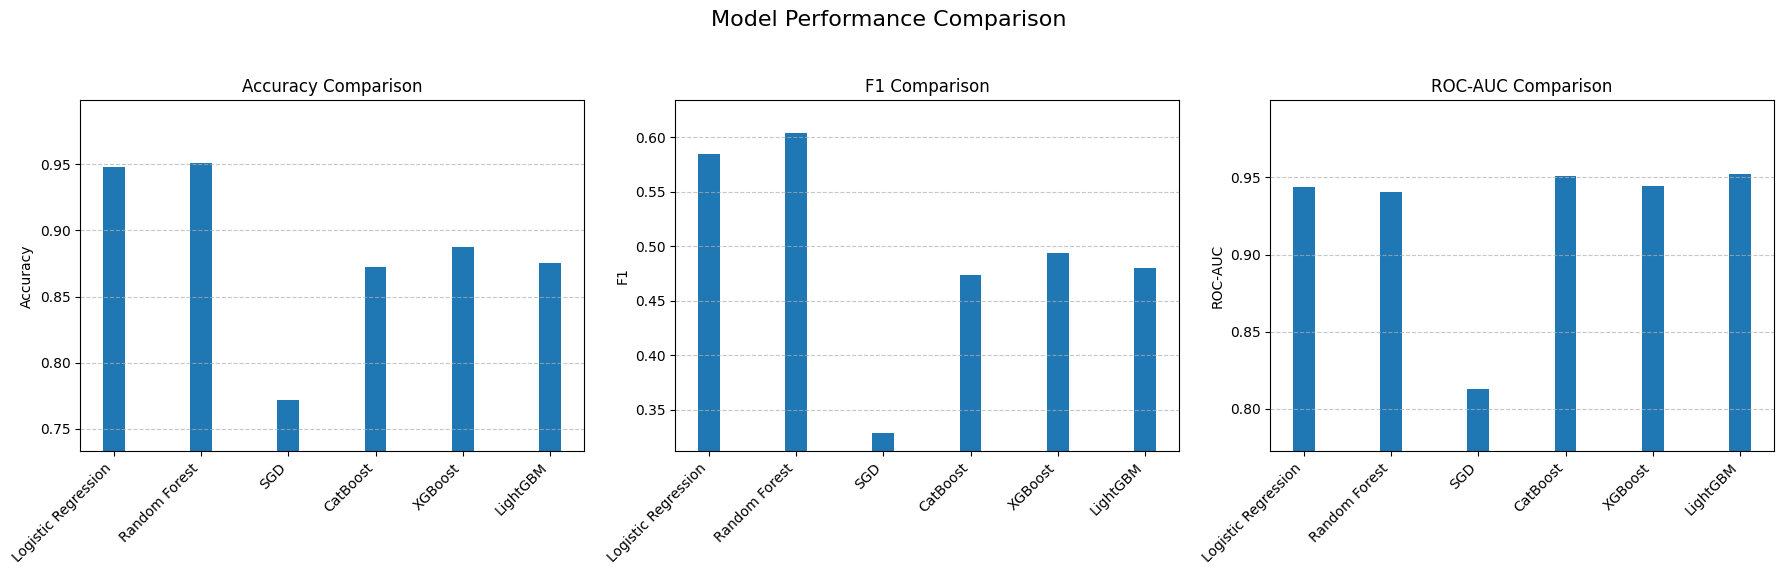

In [75]:
df_res = pd.DataFrame(results)
models = df_res['Model']
metrics = ['Accuracy', 'F1', 'ROC-AUC']
# Removed colors

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
fig.suptitle('Model Performance Comparison', fontsize=16)

width = 0.25 # width of bars
x = np.arange(len(models)) # label locations

for i, metric in enumerate(metrics):
    rects = axes[i].bar(x, df_res[metric], width, label=metric)
    axes[i].set_ylabel(metric)
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(models, rotation=45, ha="right")
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    axes[i].set_ylim(bottom=df_res[metric].min() * 0.95, top=df_res[metric].max() * 1.05)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Hyperparameter Tuning

## Grid search

In [104]:
print("\n=== LightGBM Grid Search CV ===\n")
param_grid = {
    'max_depth':        [4, 5, 6, 7],
    'learning_rate':    [0.1, 0.01, 0.05],
    'n_estimators':     [100, 200, 500],
    'subsample':        [0.6, 0.8, 1.0],
    'num_leaves':       [31, 63, 127],
    'min_child_samples':[20, 50],
}

from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

scale = w_train[y_train == 0].sum() / w_train[y_train == 1].sum()
clf = lgb.LGBMClassifier(random_state=131,scale_pos_weight=scale )

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='roc_auc',n_jobs=-1)
grid_search.fit(X_train, y_train, sample_weight=w_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)



=== LightGBM Grid Search CV ===

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_child_samples': 50, 'n_estimators': 200, 'num_leaves': 31, 'subsample': 0.6}


In [105]:
best_clf = grid_search.best_estimator_
y_pred  = best_clf.predict(X_test)
y_proba = best_clf.predict_proba(X_test)[:, 1]

lgb_accuracy = accuracy_score(y_test, y_pred, sample_weight=w_test)
lgb_f1       = f1_score(y_test, y_pred, sample_weight=w_test)
lgb_recall   = recall_score(y_test, y_pred, sample_weight=w_test)
lgb_auc      = roc_auc_score(y_test, y_proba, sample_weight=w_test)

print(f"\nAccuracy : {lgb_accuracy:.4f}")
print(f"F1       : {lgb_f1:.4f}")
print(f"Recall   : {lgb_recall:.4f}")
print(f"AUC      : {lgb_auc:.4f}")

print("\nClassification Report:\n",classification_report(y_test, y_pred, sample_weight=w_test))

cf_matrix = confusion_matrix(y_test, y_pred, sample_weight=w_test)
print("Confusion Matrix:\n", cf_matrix)


Accuracy : 0.8844
F1       : 0.4953
Recall   : 0.8756
AUC      : 0.9528

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93 64875773.33000002
           1       0.35      0.88      0.50 4494016.6700000055

    accuracy                           0.88 69369790.00000003
   macro avg       0.67      0.88      0.71 69369790.00000003
weighted avg       0.95      0.88      0.91 69369790.00000003

Confusion Matrix:
 [[57414863.94999998  7460909.37999998]
 [  559105.71        3934910.96000001]]


## HyperOpt

In [79]:
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval
from hyperopt.early_stop import no_progress_loss

scale = w_train_resampled[y_train_resampled == 0].sum() / w_train_resampled[y_train_resampled == 1].sum()

space = {
    # Learning
    'learning_rate'     : hp.uniform('learning_rate', 0.01, 0.3),
    'n_estimators'      : hp.choice('n_estimators', np.arange(100, 1000, 10, dtype='int')),

    # Tree structure
    'num_leaves'        : hp.choice('num_leaves', np.arange(20, 150, 5, dtype='int')),
    'max_depth'         : hp.choice('max_depth', [-1, 4, 5, 6, 7, 8]),

    # Regularisation
    'reg_alpha'         : hp.uniform('reg_alpha', 0, 1),
    'reg_lambda'        : hp.uniform('reg_lambda', 0, 1),
    'min_child_samples' : hp.choice('min_child_samples', np.arange(10, 100, 5, dtype='int')),
    'min_split_gain'    : hp.uniform('min_split_gain', 0, 0.5),

    # Sampling
    'subsample'         : hp.uniform('subsample', 0.5, 1.0),
    'colsample_bytree'  : hp.uniform('colsample_bytree', 0.5, 1.0),

    # Fixed
    'scale_pos_weight'  : scale,       # class imbalance weight
    'random_state'      : 141,
    'verbose'           : -1,
}


def lgb_objective(params):
    clf = lgb.LGBMClassifier(**params)

    score = cross_val_score(
        clf,
        X_train_resampled, y_train_resampled,
        cv=5,
        scoring='roc_auc',
        params={'sample_weight': w_train_resampled}
    ).mean()

    return {'loss': -score, 'status': STATUS_OK}

trials = Trials()

best_params = fmin(
    fn=lgb_objective,
    space=space,
    algo=tpe.suggest,
    max_evals=200,
    trials=trials,
    early_stop_fn=no_progress_loss(50)
)


best_params_decoded = space_eval(space, best_params)
print("Best Hyperparameters:\n", best_params_decoded)


best_clf = lgb.LGBMClassifier(**best_params_decoded)
best_clf.fit(X_train_resampled, y_train_resampled, sample_weight=w_train_resampled)

y_pred  = best_clf.predict(X_test)
y_proba = best_clf.predict_proba(X_test)[:, 1]

lgb_accuracy = accuracy_score(y_test, y_pred, sample_weight=w_test)
lgb_f1       = f1_score(y_test, y_pred, sample_weight=w_test)
lgb_recall   = recall_score(y_test, y_pred, sample_weight=w_test)
lgb_auc      = roc_auc_score(y_test, y_proba, sample_weight=w_test)

print(f"\nAccuracy : {lgb_accuracy:.4f}")
print(f"F1       : {lgb_f1:.4f}")
print(f"Recall   : {lgb_recall:.4f}")
print(f"AUC      : {lgb_auc:.4f}")

print("\nClassification Report:\n",classification_report(y_test, y_pred, sample_weight=w_test))

cf_matrix = confusion_matrix(y_test, y_pred, sample_weight=w_test)
print("Confusion Matrix:\n", cf_matrix)

Best Hyperparameters:
 {'colsample_bytree': 0.5187618128294202, 'learning_rate': 0.023098069259371082, 'max_depth': 7, 'min_child_samples': np.int64(75), 'min_split_gain': 0.17421591065929348, 'n_estimators': np.int64(810), 'num_leaves': np.int64(45), 'random_state': 141, 'reg_alpha': 0.06067184360325228, 'reg_lambda': 0.4253819203894115, 'scale_pos_weight': np.float64(6.802484033819776), 'subsample': 0.5653125958019853, 'verbose': -1}

Accuracy : 0.8815
F1       : 0.4913
Recall   : 0.8831
AUC      : 0.9534

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93 64875773.33000002
           1       0.34      0.88      0.49 4494016.6700000055

    accuracy                           0.88 69369790.00000003
   macro avg       0.67      0.88      0.71 69369790.00000003
weighted avg       0.95      0.88      0.90 69369790.00000003

Confusion Matrix:
 [[57182697.00000001  7693076.33      ]
 [  525221.64        3968795.0300000

In [80]:
best_clf

LGBMClassifier(colsample_bytree=0.5187618128294202,
               learning_rate=0.023098069259371082, max_depth=7,
               min_child_samples=np.int64(75),
               min_split_gain=0.17421591065929348, n_estimators=np.int64(810),
               num_leaves=np.int64(45), random_state=141,
               reg_alpha=0.06067184360325228, reg_lambda=0.4253819203894115,
               scale_pos_weight=np.float64(6.802484033819776),
               subsample=0.5653125958019853, verbose=-1)

In [ ]:

# LGBMClassifier(colsample_bytree=0.5187618128294202,
#                learning_rate=0.023098069259371082, max_depth=7,
#                min_child_samples=np.int64(75),
#                min_split_gain=0.17421591065929348, n_estimators=np.int64(810),
#                num_leaves=np.int64(45), random_state=141,
#                reg_alpha=0.06067184360325228, reg_lambda=0.4253819203894115,
#                scale_pos_weight=np.float64(6.802484033819776),
#                subsample=0.5653125958019853, verbose=-1)

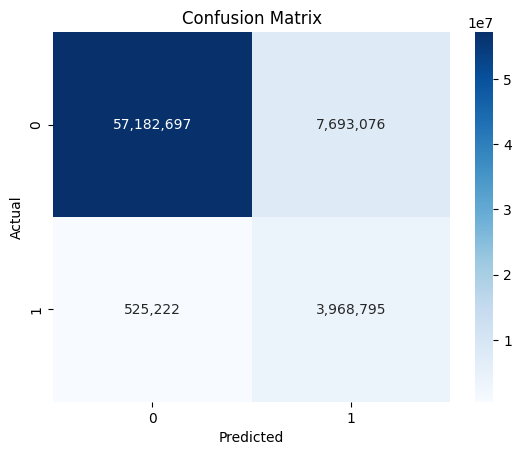

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cf_matrix, annot=True, fmt=',.0f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Fairness

In [86]:
X_test2 = X_test.copy()
X_test2['sex'] = np.where(X_test2['sex_Male'] == 1, 'Male', 'Female')

In [89]:
race_cols = [
    'race_Amer Indian Aleut or Eskimo',
    'race_Asian or Pacific Islander',
    'race_Black',
    'race_Other',
    'race_White'
]

X_test2['race'] = (
    X_test2[race_cols]
    .idxmax(axis=1)                 # pick column with value = 1
    .str.replace('race_', '', regex=False)
)

In [93]:
# pip install fairlearn

from fairlearn.metrics import (
    demographic_parity_ratio,
    demographic_parity_difference,
    equalized_odds_ratio,
    equalized_odds_difference
)

print("=" * 60)
print("FAIRNESS METRICS (Sensitive Feature: SEX)")
print("=" * 60)

# --- Sex ---
dp_ratio_sex = demographic_parity_ratio(
    y_test, y_pred, sensitive_features=X_test2["sex"]
)

dp_diff_sex = demographic_parity_difference(
    y_test, y_pred, sensitive_features=X_test2["sex"]
)

eo_ratio_sex = equalized_odds_ratio(
    y_test, y_pred, sensitive_features=X_test2["sex"]
)

eo_diff_sex = equalized_odds_difference(
    y_test, y_pred, sensitive_features=X_test2["sex"]
)

print("\nDemographic Parity (Sex)")
print(f"  Ratio      : {dp_ratio_sex:.4f}")
print(f"  Difference : {dp_diff_sex:.4f}")

print("\nEqualized Odds (Sex)")
print(f"  Ratio      : {eo_ratio_sex:.4f}")
print(f"  Difference : {eo_diff_sex:.4f}")

print("\n")


print("=" * 60)
print("FAIRNESS METRICS (Sensitive Feature: RACE)")
print("=" * 60)

# --- Race ---
dp_ratio_race = demographic_parity_ratio(
    y_test, y_pred, sensitive_features=X_test2["race"]
)

dp_diff_race = demographic_parity_difference(
    y_test, y_pred, sensitive_features=X_test2["race"]
)

eo_ratio_race = equalized_odds_ratio(
    y_test, y_pred, sensitive_features=X_test2["race"]
)

eo_diff_race = equalized_odds_difference(
    y_test, y_pred, sensitive_features=X_test2["race"]
)

print("\nDemographic Parity (Race)")
print(f"  Ratio      : {dp_ratio_race:.4f}")
print(f"  Difference : {dp_diff_race:.4f}")

print("\nEqualized Odds (Race)")
print(f"  Ratio      : {eo_ratio_race:.4f}")
print(f"  Difference : {eo_diff_race:.4f}")

print("=" * 60)


FAIRNESS METRICS (Sensitive Feature: SEX)

Demographic Parity (Sex)
  Ratio      : 0.3063
  Difference : 0.1793

Equalized Odds (Sex)
  Ratio      : 0.3352
  Difference : 0.1373


FAIRNESS METRICS (Sensitive Feature: RACE)

Demographic Parity (Race)
  Ratio      : 0.2959
  Difference : 0.1309

Equalized Odds (Race)
  Ratio      : 0.2682
  Difference : 0.1213


# EXplainable AI

### SHAP

In [95]:
import shap
explainer = shap.TreeExplainer(best_clf)
shap_values = explainer.shap_values(X_test[:5000])
shap_values.shape

(5000, 81)

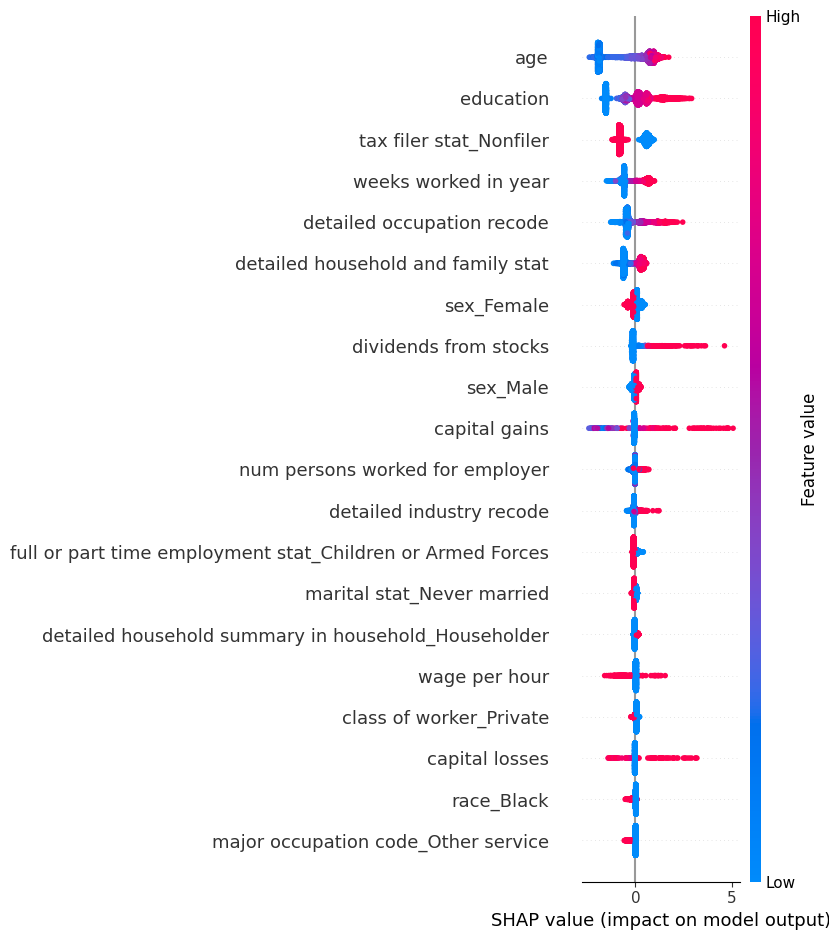

In [96]:
shap.summary_plot(shap_values, X_test[:5000])

In [97]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0, :])

In [101]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[4, :], X_test.iloc[4, :])

Incase JS does not load

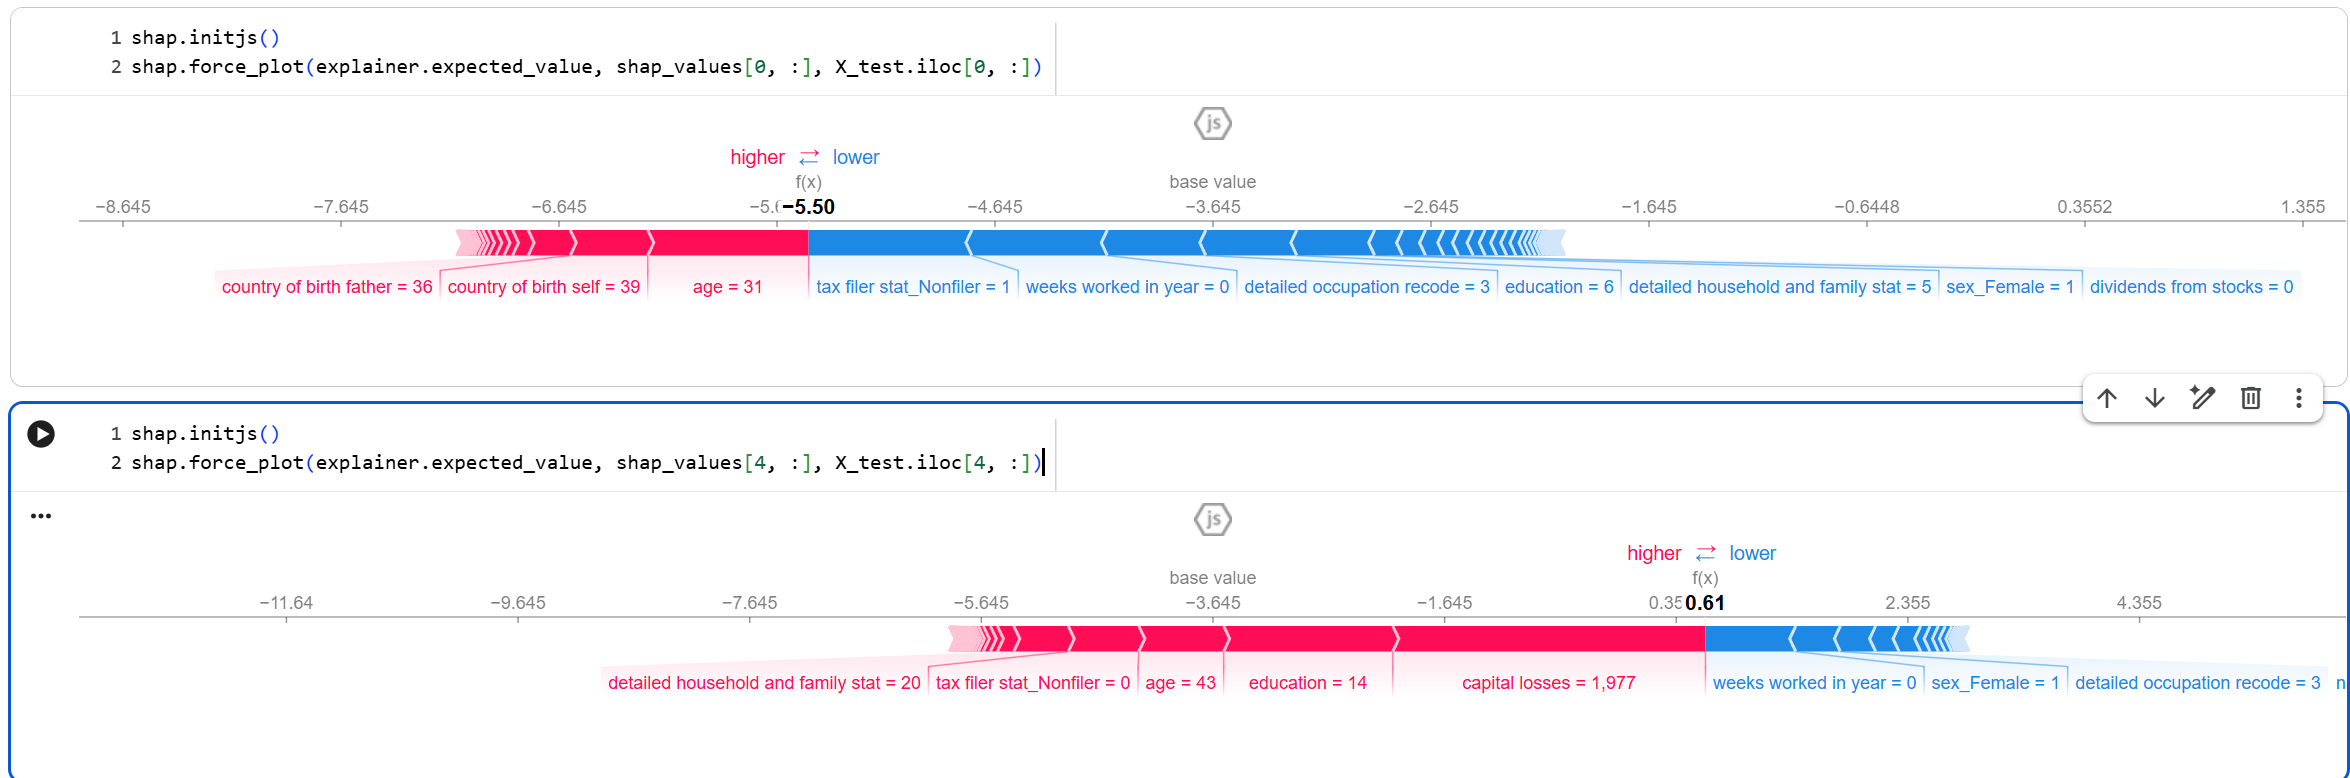

### Decision Tree

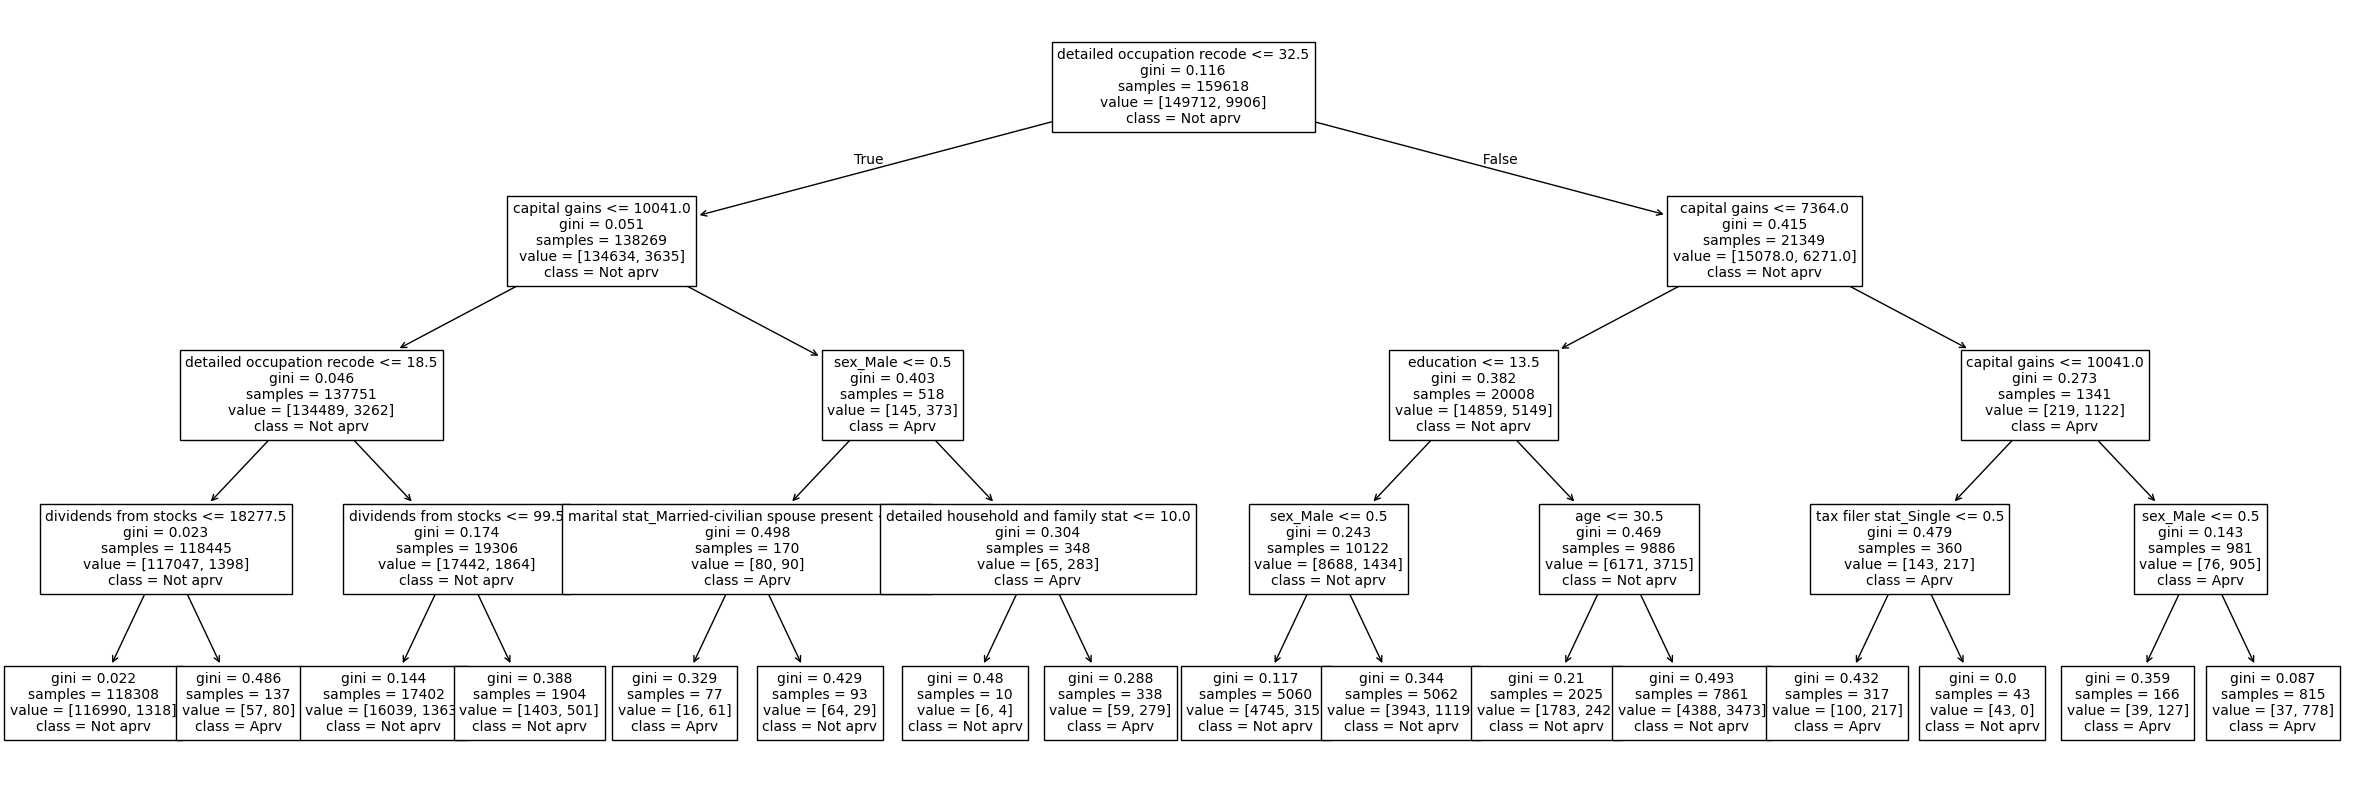

In [102]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1234319010,criterion = 'gini',max_depth=4)
dt.fit(X_train, y_train)
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(30,10))
tree.plot_tree(dt, fontsize =10, feature_names = X_train.columns,class_names=['Not aprv','Aprv'])
plt.show()